In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
#importing, scaling reshaping and vectorizing the data set
((trainX, trainY), (testX, testY)) = cifar10.load_data()

#scaling data
trainX = trainX.astype('float')/255.0
testX = testX.astype('float')/255.0


#vectorizing the labels
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [3]:
#initializing the label names
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
             'frog', 'horse', 'ship', 'truck']

In [4]:
#initializing the model
chanDim= -1
def model():
    
    model = Sequential()
    #first layer of Conv2D
    model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    #second layer of Conv2D
    model.add(Conv2D(64, (3,3), padding = 'same', input_shape = (32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    #FC layet
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [5]:
#initializing the optimizer and model
opt = SGD(lr = 0.01, decay = 0.01/40, momentum = 0.9, nesterov = True)
model = model()
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________

In [6]:
H = model.fit(trainX, trainY, validation_data = (testX, testY), batch_size = 64, epochs = 40, verbose = 1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 10s 203us/sample - loss: 1.8288 - acc: 0.3283 - val_loss: 1.4938 - val_acc: 0.4612
Epoch 2/40
50000/50000 [==============================] - 8s 156us/sample - loss: 1.3931 - acc: 0.4934 - val_loss: 1.2059 - val_acc: 0.5735
Epoch 3/40
50000/50000 [==============================] - 8s 155us/sample - loss: 1.1939 - acc: 0.5695 - val_loss: 1.1527 - val_acc: 0.5914
Epoch 4/40
50000/50000 [==============================] - 8s 156us/sample - loss: 1.0663 - acc: 0.6186 - val_loss: 0.9632 - val_acc: 0.6574
Epoch 5/40
50000/50000 [==============================] - 8s 157us/sample - loss: 0.9827 - acc: 0.6492 - val_loss: 0.8754 - val_acc: 0.6923
Epoch 6/40
50000/50000 [==============================] - 8s 165us/sample - loss: 0.9086 - acc: 0.6776 - val_loss: 0.8257 - val_acc: 0.7139
Epoch 7/40
50000/50000 [==============================] - 8s 164us/sample - loss: 0.8501 - acc: 0.7005 - val_

In [7]:
#evaluating the network
predictions = model.predict(testX, batch_size = 64)
print(classification_report(testY.argmax(axis = 1), predictions.argmax(axis = 1),
                           target_names = labelNames))

              precision    recall  f1-score   support

    airplane       0.84      0.86      0.85      1000
  automobile       0.90      0.91      0.91      1000
        bird       0.79      0.68      0.73      1000
         cat       0.64      0.64      0.64      1000
        deer       0.78      0.76      0.77      1000
         dog       0.71      0.72      0.71      1000
        frog       0.81      0.90      0.85      1000
       horse       0.86      0.85      0.85      1000
        ship       0.88      0.90      0.89      1000
       truck       0.87      0.88      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



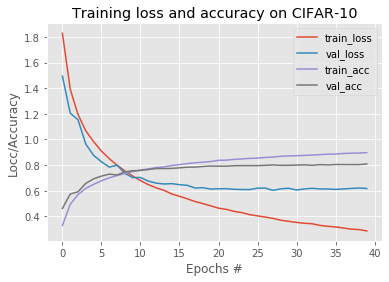

In [8]:
#plotting the training loss and accuracy
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 40), H.history['loss'], label = 'train_loss')
plt.plot(np.arange(0, 40), H.history['val_loss'], label = 'val_loss')
plt.plot(np.arange(0, 40), H.history['acc'], label = 'train_acc')
plt.plot(np.arange(0, 40), H.history['val_acc'], label = 'val_acc')
plt.title('Training loss and accuracy on CIFAR-10')
plt.xlabel('Epochs #')
plt.ylabel('Locc/Accuracy')
plt.legend()
plt.savefig('output.png')